In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
# Blue, green, red
colors = ['#1f77b4', '#2ca02c', '#d62728']

/tmp/ipykernel_20311/1641942562.py:2: RuntimeWarning: divide by zero encountered in power
  return (1.0 - epsilon) - (theta1 * np.power(x, -theta2))


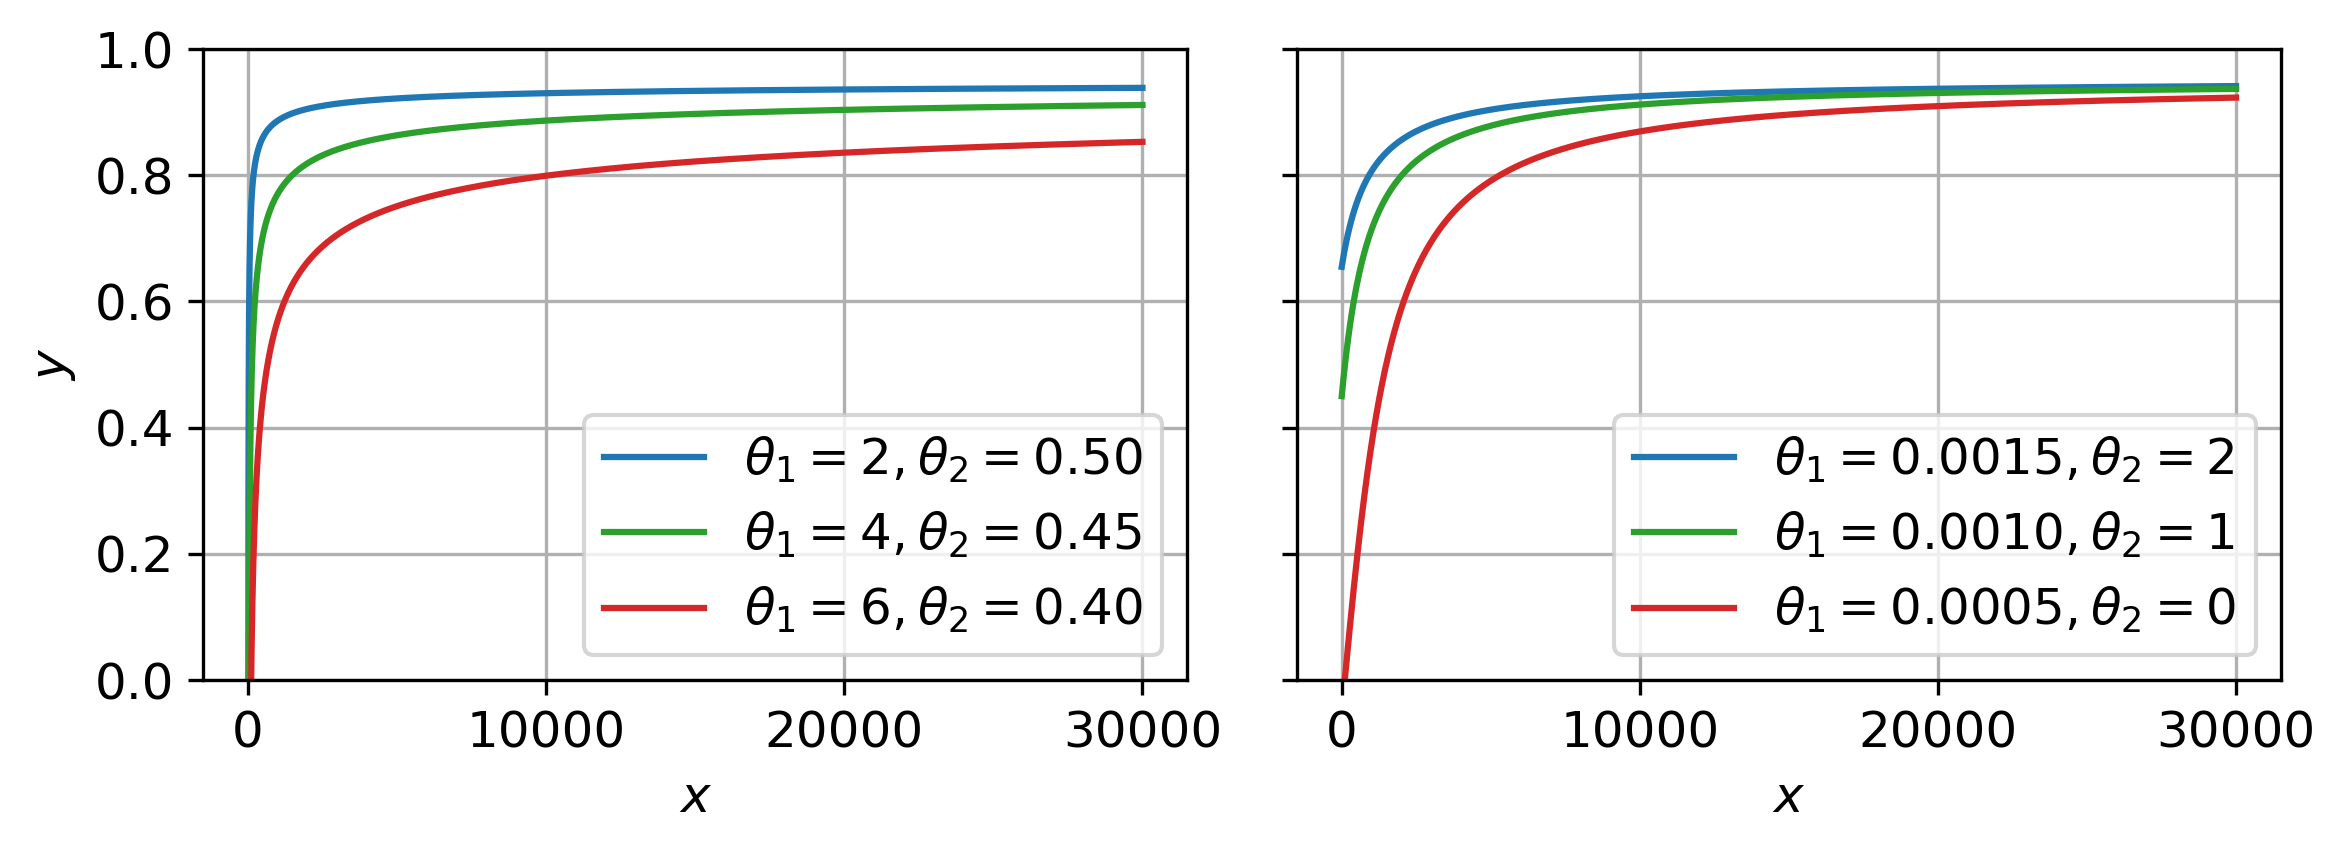

In [3]:
def power_law(x, theta1, theta2, epsilon=0.05):
    return (1.0 - epsilon) - (theta1 * np.power(x, -theta2))

def arctan(x, theta1, theta2, epsilon=0.05):
    return 2/np.pi * np.arctan(theta1 * np.pi/2 * x + theta2) - epsilon

x = np.linspace(0, 30000, 10000)
ncols, nrows = 2, 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), sharex=True, sharey=True, dpi=300)
# Power law
theta1s = [2, 4, 6]
theta2s = [0.5, 0.45, 0.4]
for theta1, theta2, color in zip(theta1s, theta2s, colors):
    np.array(axs).flatten()[0]\
    .plot(x, power_law(x, theta1, theta2), color=color, label=r'$\theta_1={}, \theta_2={:.2f}$'.format(theta1, theta2))
#for theta1, theta2, color in zip([6, 6, 6], theta2s, colors):
#    np.array(axs).flatten()[1]\
#    .plot(x, power_law(x, theta1, theta2), color=color, label=r'$\theta_1={}, \theta_2={:.2f}$'.format(theta1, theta2))
# Arctan
theta1s = [0.0015, 0.001, 0.0005]
theta2s = [2, 1, 0]
for theta1, theta2, color in zip(theta1s, theta2s, colors):
    np.array(axs).flatten()[1]\
    .plot(x, arctan(x, theta1, theta2), color=color, label=r'$\theta_1={:.4f}, \theta_2={}$'.format(theta1, theta2))
#for theta1, theta2, color in zip([0.0005, 0.0005, 0.0005], theta2s, colors):
#    np.array(axs).flatten()[3]\
#    .plot(x, arctan(x, theta1, theta2), color=color, label=r'$\theta_1={:.4f}, \theta_2={}$'.format(theta1, theta2))
for figure_index in range(ncols*nrows):
    if math.floor(figure_index/ncols)+1 == nrows:
        np.array(axs).flatten()[figure_index]\
        .set_xlabel(r'$x$')
    if figure_index%ncols == 0:
        np.array(axs).flatten()[figure_index]\
        .set_ylabel(r'$y$')
    np.array(axs).flatten()[figure_index]\
    .set_ylim([0,1])
    np.array(axs).flatten()[figure_index]\
    .legend()
    np.array(axs).flatten()[figure_index]\
    .grid()
fig.tight_layout()
fig.show()

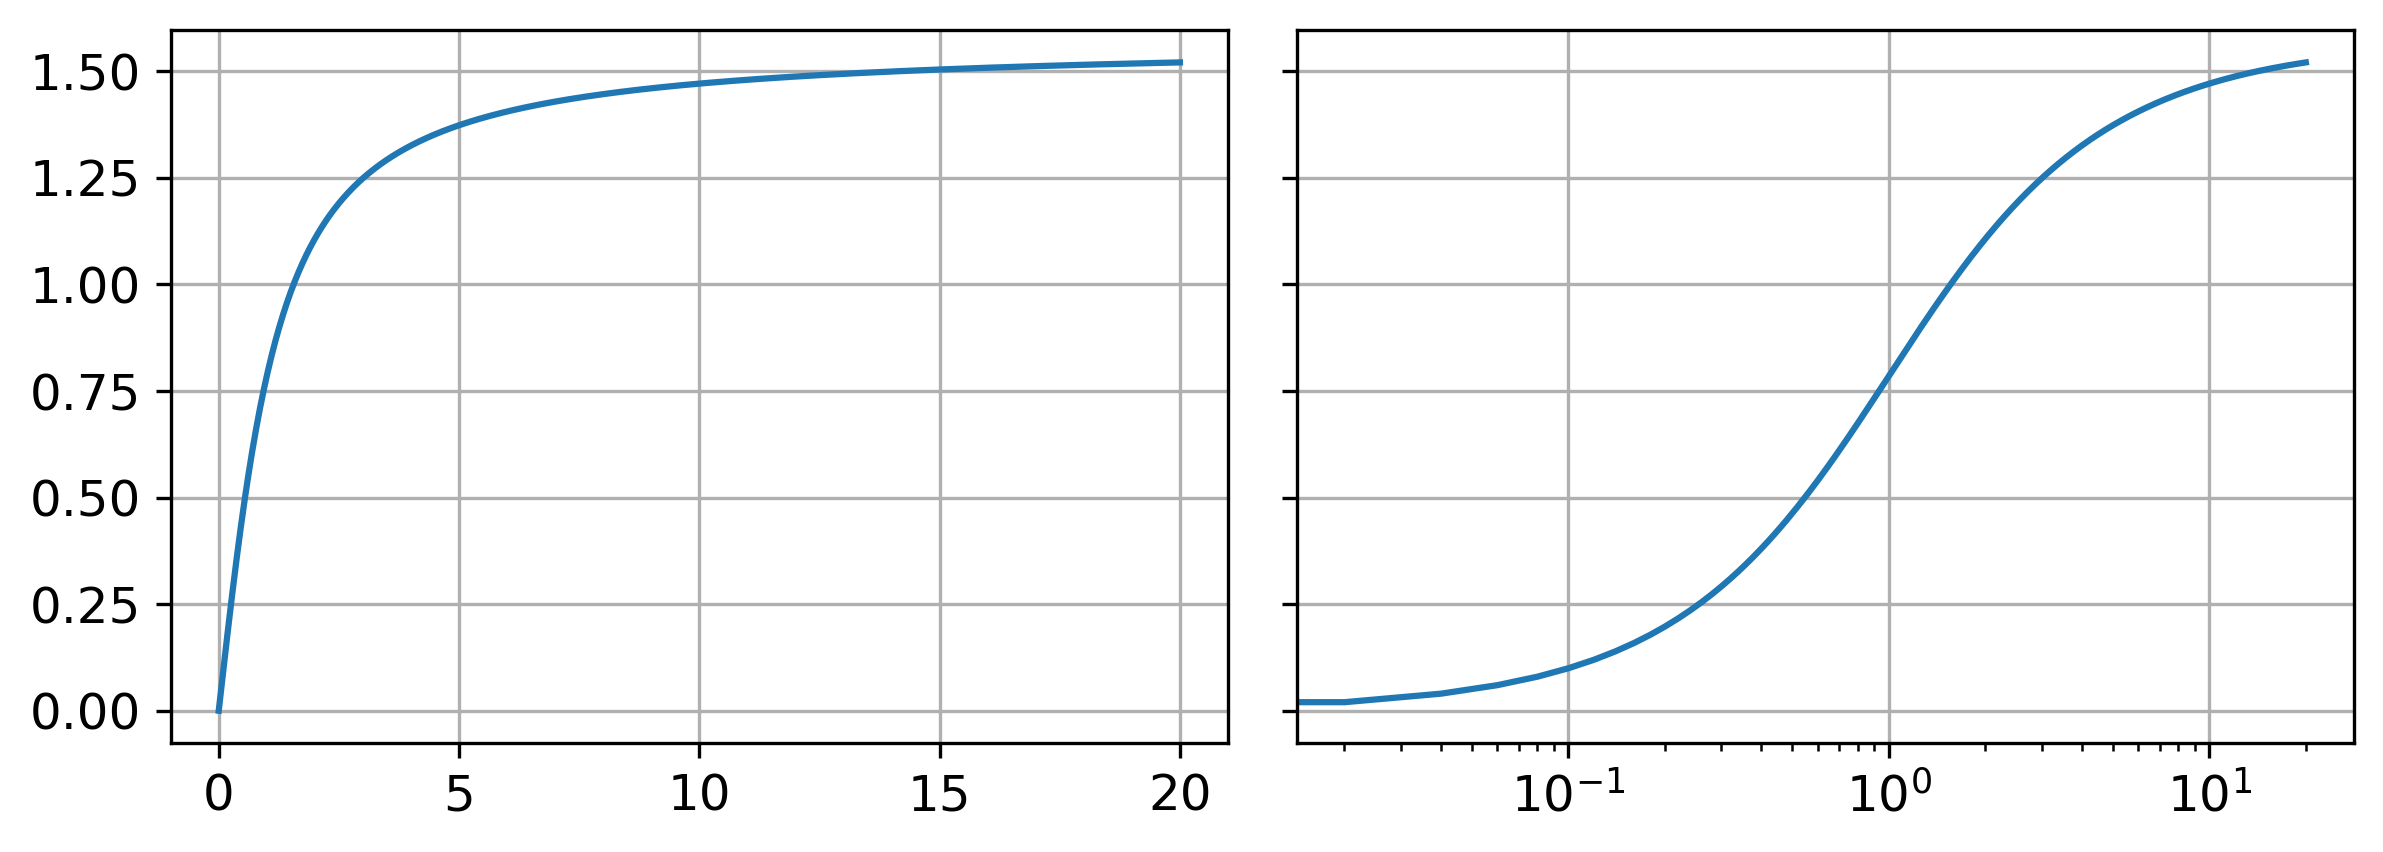

In [4]:
x = np.linspace(0, 20, 1000)
ncols, nrows = 2, 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3), sharey=True, dpi=300)
np.array(axs).flatten()[0]\
.plot(x, np.arctan(x))
np.array(axs).flatten()[1]\
.plot(x, np.arctan(x))
np.array(axs).flatten()[1]\
.set_xscale('log')
np.array(axs).flatten()[0]\
.grid()
np.array(axs).flatten()[1]\
.grid()
fig.tight_layout()
fig.show()